In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import scipy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
predictions = pd.read_csv('final_predictions.csv')
actual_times = pd.read_csv('test_orders_target.csv')

In [3]:
predictions.head()

,order_id,food_prep_time_minutes
0,61fb5702-9aca-44e9-9567-5d075dda72c8,33.650429
1,5a53c40f-752b-43f9-954b-8c160ade3e55,27.301573
2,e45c8a8c-990c-465e-91a8-dec36db127d7,32.121658
3,3e2db92c-db73-4e8f-ac24-32a8081cd18e,15.141108
4,8f7f5455-3ee5-473c-a2d7-5f41acd2453a,13.566219


In [4]:
actual_times.head()

,order_id,food_prep_time_minutes
0,61fb5702-9aca-44e9-9567-5d075dda72c8,32
1,5a53c40f-752b-43f9-954b-8c160ade3e55,31
2,e45c8a8c-990c-465e-91a8-dec36db127d7,32
3,3e2db92c-db73-4e8f-ac24-32a8081cd18e,16
4,8f7f5455-3ee5-473c-a2d7-5f41acd2453a,14


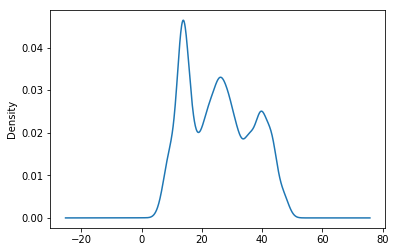

In [5]:
predictions["food_prep_time_minutes"].plot.kde()

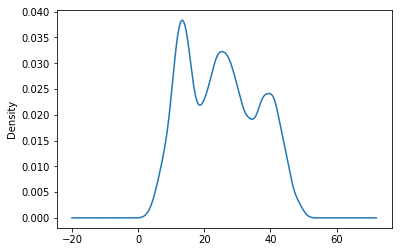

In [6]:
actual_times["food_prep_time_minutes"].plot.kde()

In [7]:
df = pd.DataFrame()
df["prediction_time"] = predictions["food_prep_time_minutes"]
df["actual_time"] = actual_times["food_prep_time_minutes"]

In [8]:
df.head()

,prediction_time,actual_time
0,33.650429,32
1,27.301573,31
2,32.121658,32
3,15.141108,16
4,13.566219,14


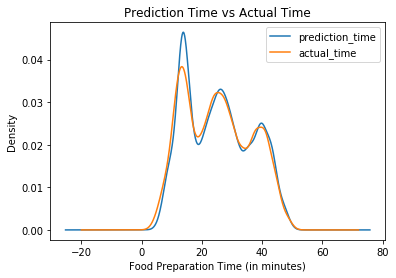

In [9]:
df[["prediction_time", "actual_time"]].plot.kde()
plt.xlabel("Food Preparation Time (in minutes)")
plt.title("Prediction Time vs Actual Time")
plt.savefig("prediction_vs_actual.png")

The predicted food prepeartion times and actual food preparation times are close to each other except for the left most local maximas. The model seems quite good in predicting, but to check how good it is, r^2, RMSE need to be calculated.

In [10]:
# https://stackoverflow.com/a/13918150
def rsquared(x, y):
    """ Return R^2 where x and y are array-like. """

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

print("r2 =", rsquared(df["actual_time"], df["prediction_time"]), "> 0.6100377")
print("mae =", mean_absolute_error(df["actual_time"], df["prediction_time"]), "< 5.448831")
print("root mse =", math.sqrt(mean_squared_error(df["actual_time"], df["prediction_time"])), "< 6.978090")

r2 = 0.9599909551423244 > 0.6100377
mae = 1.7071281236886977 < 5.448831
root mse = 2.2393729909651934 < 6.978090
